In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
filename = 'android-studio-data.csv'
studio_data = pd.read_csv(filename,header=None)
studio_data = studio_data.rename(columns={0:"app",1:"laptop",2:"step",3:"time"})
studio_data.index.names=['id']
studio_data

,app,laptop,step,time
id,,,,
0,Field Day,old,Sync at Studio Launch,64.736
1,Field Day,old,Build Not Install,4.705
2,Field Day,old,Build and Install on Device,59.349
3,Major Tom,old,Sync at Studio Launch,61.274
4,Major Tom,old,Build Not Install,2.674
5,Major Tom,old,Build and Install on Device,96.861
6,Field Day,new,Sync at Studio Launch,15.363
7,Field Day,new,Build Not Install,1.368
8,Field Day,new,Build and Install on Device,11.600


In [3]:
old_fieldday = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
old_majortom = studio_data[(studio_data.laptop=='old') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)
new_fieldday = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Field Day')][['step','time']].reset_index(drop=True)
new_majortom = studio_data[(studio_data.laptop=='new') & (studio_data.app=='Major Tom')][['step','time']].reset_index(drop=True)

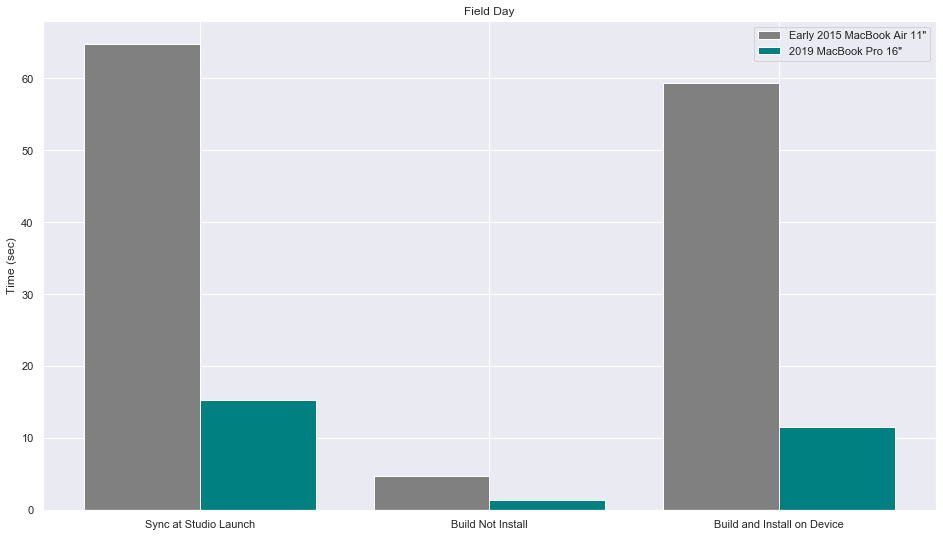

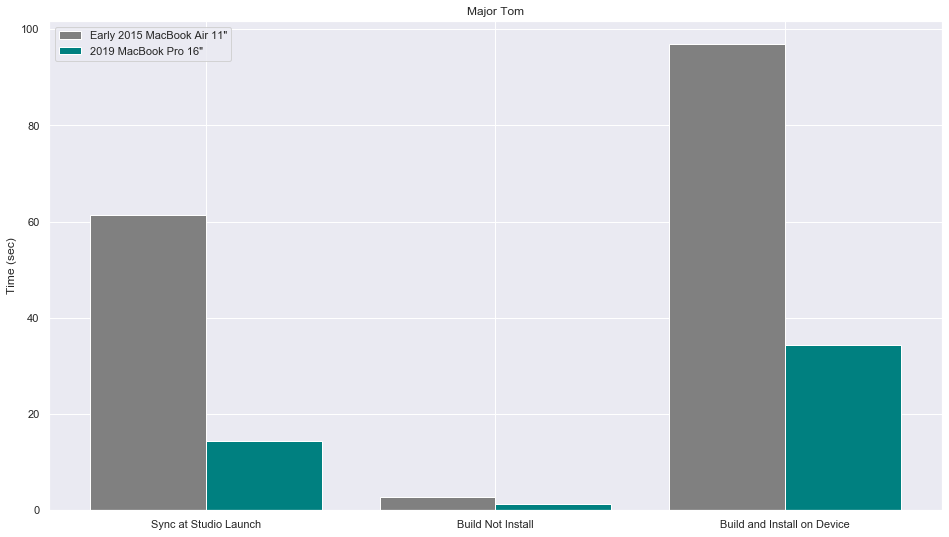

In [15]:
sns.set()

index = new_fieldday.index
bar_width = 0.4

fig = plt.figure(figsize=(16,9))

bars_old = plt.bar(index, old_fieldday['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_fieldday['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')
plt.title('Field Day')
plt.ylabel('Time (sec)')
plt.xticks(index+0.5*bar_width, studio_data.step)
plt.legend()
plt.savefig("fieldday.png", dpi=300)

plt.figure(figsize=(16,9))
bars_old = plt.bar(index, old_majortom['time'], bar_width, color='gray', label='Early 2015 MacBook Air 11\"')
bars_new = plt.bar(index + bar_width, new_majortom['time'], bar_width, color='teal', label='2019 MacBook Pro 16\"')
plt.title('Major Tom')
plt.ylabel('Time (sec)')
plt.xticks(index+0.5*bar_width, studio_data.step)
plt.legend()
plt.savefig("majortom.png", dpi=300)